In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_train = pd.read_csv("Black_Friday_train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_test = pd.read_csv("Black_Friday_test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
#Merge two datasets

df = df_train.append(df_test,sort=False)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
User_ID                       783667 non-null int64
Product_ID                    783667 non-null object
Gender                        783667 non-null object
Age                           783667 non-null object
Occupation                    783667 non-null int64
City_Category                 783667 non-null object
Stay_In_Current_City_Years    783667 non-null object
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Purchase                      550068 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
# Dropping User_ID
df.drop(["User_ID"],axis=1,inplace=True)


In [8]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
df["Gender"] = df["Gender"].replace("F",0)
df["Gender"] = df["Gender"].replace("M",1)

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df["Age"] = df["Age"].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
# City categories

df_city=pd.get_dummies(df["City_Category"],drop_first = True)


In [13]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [14]:
#Drop city category

df.drop("City_Category",axis = 1,inplace = True)

In [15]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0


In [16]:
df = pd.concat([df,df_city],axis=1)

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [18]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [19]:
df["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [20]:
df["Product_Category_2"].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [21]:
df["Product_Category_2"].mode()[0]

8.0

In [22]:
df["Product_Category_2"] = df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [23]:
#Similarly for Product_Category_3
print(df["Product_Category_3"].mode()[0])
df["Product_Category_3"] = df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

16.0


In [24]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [25]:
df["Stay_In_Current_City_Years"].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [26]:
#Here we have to convert "4+" to "4" because "4+" or "4" is the same thing.

df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].replace("4+",4)

In [27]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Product_ID                    783667 non-null object
Gender                        783667 non-null int64
Age                           783667 non-null int64
Occupation                    783667 non-null int64
Stay_In_Current_City_Years    783667 non-null object
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Purchase                      550068 non-null float64
B                             783667 non-null uint8
C                             783667 non-null uint8
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [29]:
#We can observe Stay_In_Current_City_Years is object ,we have to convert it into integer

df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Product_ID                    783667 non-null object
Gender                        783667 non-null int64
Age                           783667 non-null int64
Occupation                    783667 non-null int64
Stay_In_Current_City_Years    783667 non-null int32
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Purchase                      550068 non-null float64
B                             783667 non-null uint8
C                             783667 non-null uint8
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.3+ MB


In [31]:
# B and C are of unit8 type ,we have to convert it into int

df["B"] = df["B"].astype(int)
df["C"] = df["C"].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Product_ID                    783667 non-null object
Gender                        783667 non-null int64
Age                           783667 non-null int64
Occupation                    783667 non-null int64
Stay_In_Current_City_Years    783667 non-null int32
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Purchase                      550068 non-null float64
B                             783667 non-null int32
C                             783667 non-null int32
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


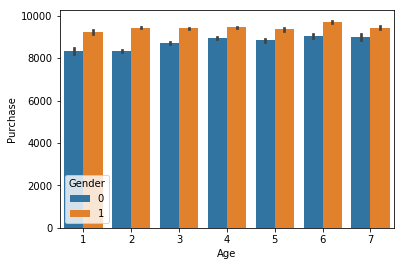

In [33]:
##Visualisation Age vs Purchased
sns.barplot('Age','Purchase',hue='Gender',data=df)

Purchasing of men is high then women

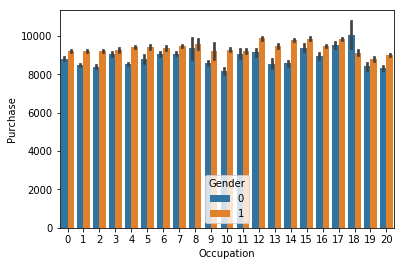

In [34]:
## Visualization of Purchase with occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

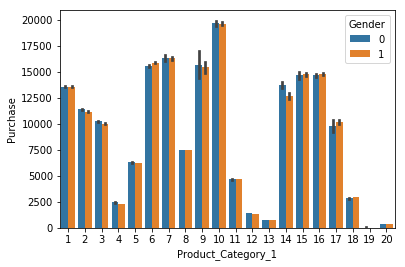

In [35]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

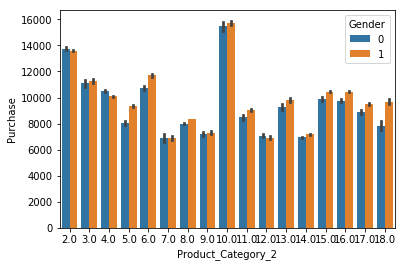

In [36]:

sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

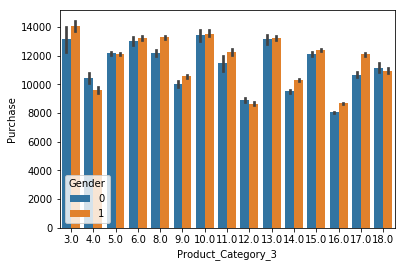

In [37]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [38]:

df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [39]:
##Feature Scaling 
df_test=df[df['Purchase'].isnull()]

In [40]:
df_train=df[~df['Purchase'].isnull()]

In [41]:
X=df_train.drop('Purchase',axis=1)

In [42]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1


In [43]:
X.shape

(550068, 11)

In [44]:
y=df_train['Purchase']

In [45]:
y.shape

(550068,)

In [46]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
5         15227.0
6         19215.0
7         15854.0
8         15686.0
9          7871.0
10         5254.0
11         3957.0
12         6073.0
13        15665.0
14         5378.0
15         2079.0
16        13055.0
17         8851.0
18        11788.0
19        19614.0
20         8584.0
21         9872.0
22         9743.0
23         5982.0
24        11927.0
25        16662.0
26         5887.0
27         6973.0
28         5391.0
29        16352.0
           ...   
550038      596.0
550039      595.0
550040       26.0
550041      488.0
550042      243.0
550043       48.0
550044       62.0
550045      252.0
550046      236.0
550047      244.0
550048      591.0
550049      473.0
550050      368.0
550051      489.0
550052      239.0
550053      371.0
550054       60.0
550055      238.0
550056      254.0
550057       61.0
550058      121.0
550059       48.0
550060      494.0
550061      599.0
550062    

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [48]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [49]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)